k sources, l rounds (k <= l)

Li: 除去 i - 1 round leaves后剩下的node i<= l
Bi: 距离burned过的nodes为1的nodes

R1 = L1/B1 
...
Rl = Ll/Bl


get matrix, k , l
S0: initialize Ri by Li


In [1]:
import networkx as nx
from numpy.linalg import matrix_power
import numpy as np
import matplotlib.pyplot as plt
import copy as cp

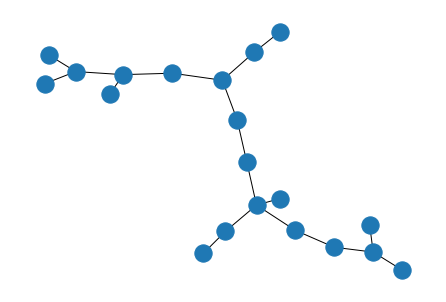

In [2]:
#generate
g = nx.random_tree(20)
# draw 
nx.draw(g, with_labels=False, font_weight='bold')
plt.show()
# to adj matrix
A = nx.adjacency_matrix(g)
A = A.todense()
A = np.array(A)

## Another way

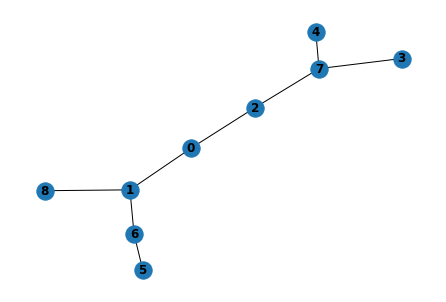

In [6]:
# generate
N = 9
g = nx.random_tree(N)
g_copy = cp.deepcopy(g)
# draw 
nx.draw(g, with_labels=True, font_weight='bold')
plt.show()

In [7]:
k = 3
l = 3
#1. list detect whether all nodes are visited
# 0: visited; 1: unvisited 
visited = np.ones([N]) 
#2. N*N matrix: ith row is Li
'''
L_matrix = np.zeros([l+1,N])  
L_matrix[0] = np.ones([N])
'''
L_list = []
notimportant = range(N)
L_list.append(notimportant)
L_list

[range(0, 9)]

# makeLL

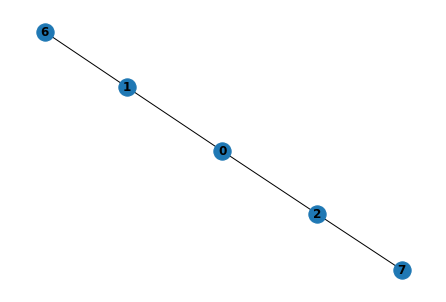

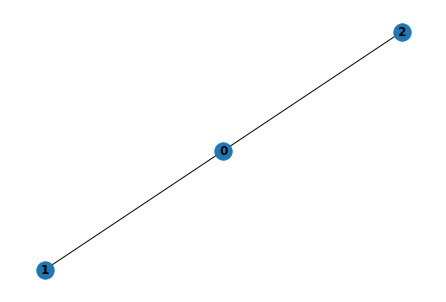

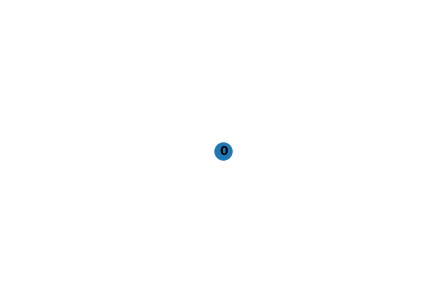

[range(0, 9), [0, 1, 2, 6, 7], [0, 1, 2], [0]]

In [8]:
def updateL(input):
    '''
    1. get all leaves
    2. delete all leaves
    '''
    #get all leaves
    temp = [x for x in g.nodes() if g.degree(x)==1]
    #remove leaves from graph
    for i in range(len(temp)):
        g.remove_node(temp[i])
    ''' '''#uncomment to show process graphs
    nx.draw(g, with_labels=True, font_weight='bold')
    plt.show()
    ''' '''
    return [x for x in input if x not in temp]# return all non-leaves; input: rest vertex, 

g = cp.deepcopy(g_copy) #copy original graph
initial = range(N) 
for i in range(l):
    leaves = updateL(initial) #get leaves left over
    initial = cp.deepcopy(leaves)
    L_list.append(initial)
    #print(leaves, len(leaves))
    ''' back up plan for L matrix
    for j in range(N):
        if j in leaves:
            #print(i+1, j)
            L_matrix[i+1][j] = 1  
    '''
L_list

## make BB: pick source, burning graph, update R

In [59]:
#initialize R and source
R_list = cp.copy(L_list)
source = -1*np.arange(1, l+2)
source

array([-1, -2, -3, -4])

In [16]:
# reverse so the order is: 1st source, 2nd source, ... , kth source
L_list.reverse()

L_list

[[0], [0, 1, 2], [0, 1, 2, 6, 7], range(0, 9)]

In [13]:
# pick source, find neighbor
# remove all from R

#it can find B
def findB(source):
    nodes_toremove = [source]
    temp = nx.all_neighbors(g_copy, source)
    for x in temp:
        nodes_toremove.append(x)
        print(x)
    return nodes_toremove

#how to pick source
sor = R_list[0]
B = findB(0)
R_list[i] = [x for x in R_list[i] if x not in B] #in Li but not in Bi

3
4
2


In [ ]:
for col in range(len(R_list)):
    for row in range(len(R_list[col])):
        
        
# iterate pick source
        